# **Fake News Detection**

# **Project Description**



# **1. Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import warnings
import re
import nltk

from ydata_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('wordnet')
#plt.style.use("cyberpunk")

[nltk_data] Downloading package punkt to /Users/przemek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/przemek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
wel_fake = pd.read_csv('data/WELFake_Dataset.csv', index_col = 0)
fake_news_net = pd.read_csv('data/FakeNewsNet.csv')
true = pd.read_csv('data/true.csv')
fake = pd.read_csv('data/fake.csv')

# **2. Data analysis**

In [3]:
def balance_plot(df, label, plot_name):
    df.groupby(label)[label].count().plot(kind='pie', autopct='%1.1f%%', title=plot_name)

In [4]:
stopwords = set(STOPWORDS)
def word_cloud_plot(df, groupby, agg_column):
    wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(df.groupby(groupby)[agg_column].sum()[0])
    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## **2.1 WEL Fake dataset**

In [5]:
wel_fake

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [6]:
#ProfileReport(wel_fake, title='WELFake').to_file('WELFake.html')

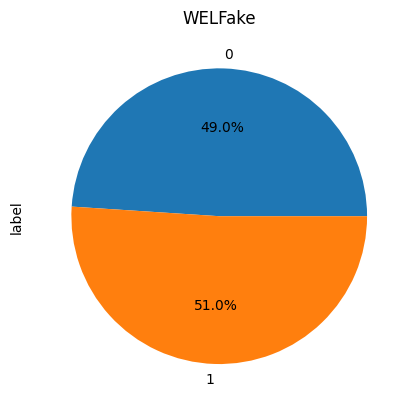

In [7]:
wel_fake.dropna(inplace=True)
balance_plot(wel_fake, 'label', 'WELFake')

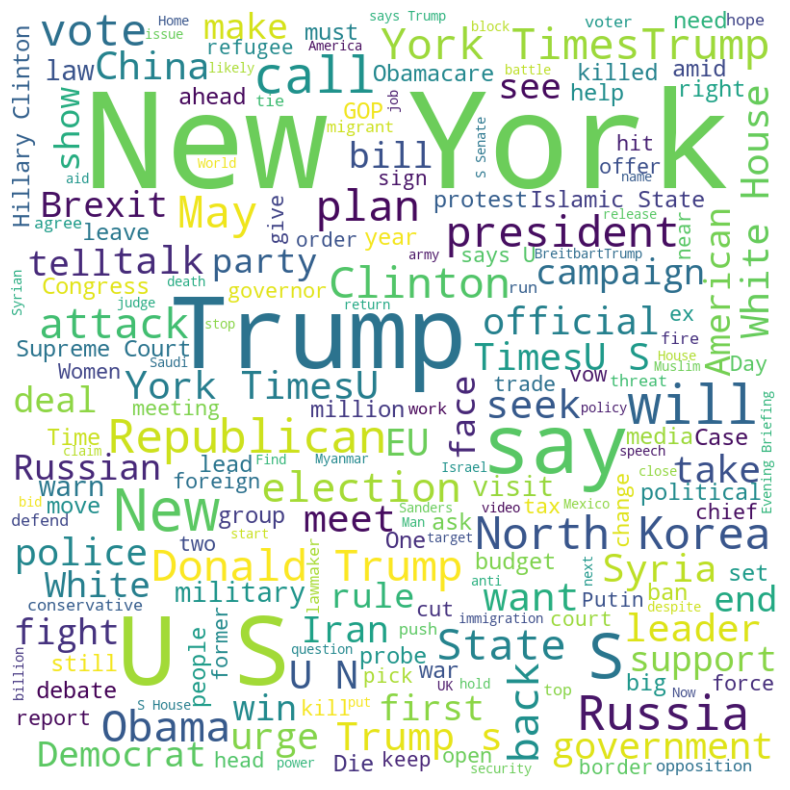

In [8]:
word_cloud_plot(wel_fake,'label', 'title')

## **2.2 Fake news net dataset**

In [9]:
fake_news_net

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0


In [10]:
#ProfileReport(fake_news_net, title='FakeNewsNet').to_file('FakeNewsNet.html')

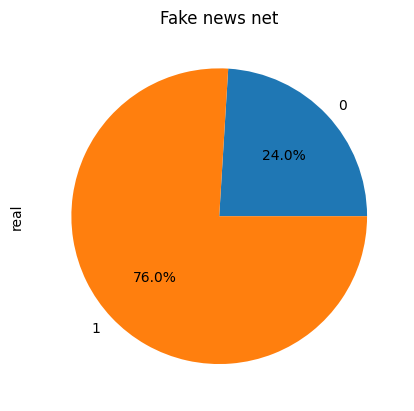

In [11]:
fake_news_net.dropna(inplace=True)
balance_plot(fake_news_net, 'real', 'Fake news net')

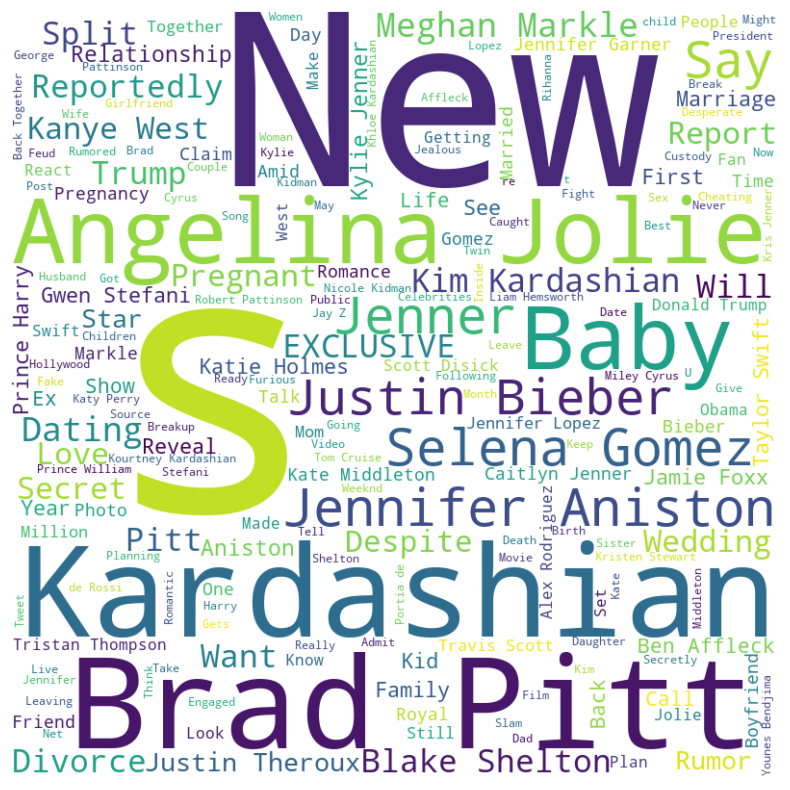

In [12]:
word_cloud_plot(fake_news_net,'real', 'title')

## **2.3 Fake and True dataset**

In [13]:
fake['label'] = 0

true['label'] = 1

In [14]:
fake_true = pd.concat([fake, true]).reset_index(drop=True)

In [15]:
#ProfileReport(fake_true, title='FakeTrue').to_file('FakeTrue.html')

In [16]:
fake_true

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [17]:
fake_true.groupby(['subject', 'label']).count()

,,title,text,date
subject,label,,,
Government News,0,1570,1570,1570
Middle-east,0,778,778,778
News,0,9050,9050,9050
US_News,0,783,783,783
left-news,0,4459,4459,4459
politics,0,6841,6841,6841
politicsNews,1,11272,11272,11272
worldnews,1,10145,10145,10145


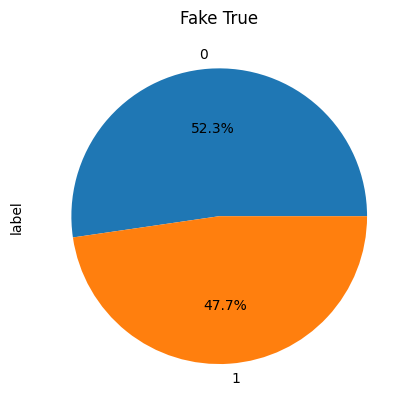

In [18]:
fake_true.dropna(inplace=True)
balance_plot(fake_true,'label', 'Fake True')

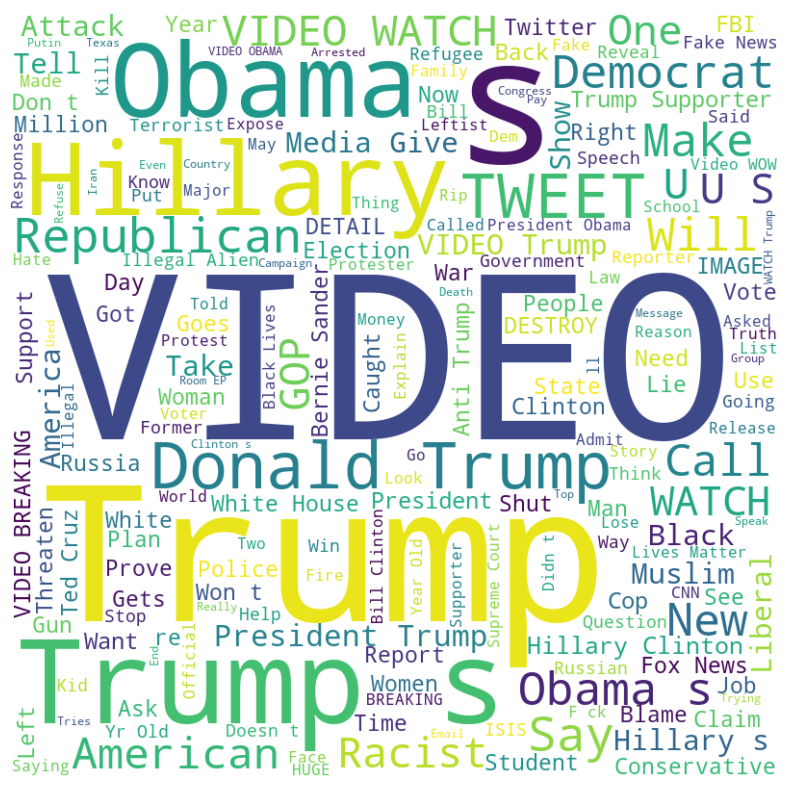

In [19]:
word_cloud_plot(fake_true,'label', 'title')

# **3. Data preprocessing**

In [20]:
#remove special characters and digits
def no_tags(text): 
    return re.sub(r'[^a-zA-Z\s]','',text)

In [21]:
def lower_case(text):
    text = [x.lower() for x in text]
    return text

In [22]:
def tokenize_text(text):
    return nltk.word_tokenize(text)

In [23]:
stop_words = set(STOPWORDS)
def cut_stop_words(text):
        filtered_words = [word for word in text if word not in stop_words]
        return filtered_words

In [24]:
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemantize_text(text):
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmatized_words

In [25]:
def preprocessing(df, col_name, new_col):
    df[col_name] = df[col_name].apply(no_tags) 
    df[new_col] = df[col_name].apply(tokenize_text)
    df[new_col] = df[new_col].apply(lower_case)
    df[new_col] = df[new_col].apply(cut_stop_words)
    df[new_col] = df[new_col].apply(lemantize_text)
    return df

## **3.1 WEL Fake preprocessing**

In [26]:
wel_fake = preprocessing(wel_fake, 'title', 'tokens')

In [27]:
wel_fake

,title,text,label,tokens
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,"[law, enforcement, high, alert, follow, threat..."
2,UNBELIEVABLE OBAMAS ATTORNEY GENERAL SAYS MOST...,"Now, most of the demonstrators gathered last ...",1,"[unbelievable, obamas, attorney, general, say,..."
3,Bobby Jindal raised Hindu uses story of Christ...,A dozen politically active pastors came here f...,0,"[bobby, jindal, raise, hindu, use, story, chri..."
4,SATAN Russia unvelis an image of its terrifyi...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"[satan, russia, unvelis, image, terrify, new, ..."
5,About Time Christian Group Sues Amazon and SPL...,All we can say on this one is it s about time ...,1,"[time, christian, group, sue, amazon, splc, de..."
...,...,...,...,...
72129,Russians steal research on Trump in hack of US...,WASHINGTON (Reuters) - Hackers believed to be ...,0,"[russians, steal, research, trump, hack, us, d..."
72130,WATCH Giuliani Demands That Democrats Apologi...,"You know, because in fantasyland Republicans n...",1,"[watch, giuliani, demand, democrats, apologize..."
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,"[migrants, refuse, leave, train, refugee, camp..."
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,"[trump, tussle, give, unpopular, mexican, lead..."


## **3.2 Fake News Net preprocessing**

In [28]:
#Data balance

In [29]:
#fake_news_net['news_url'] = fake_news_net['news_url'].str.split('/')
fake_news_net = preprocessing(fake_news_net, 'title', 'title')
fake_news_net = preprocessing(fake_news_net, 'news_url', 'news_url')

In [30]:
fake_news_net

,title,news_url,source_domain,tweet_num,real
0,"[kandi, burruss, explode, rape, accusation, re...",[httptoofabcomrealhousewivesatlantakandiburrus...,toofab.com,42,1
1,"[people, choice, award, best, red, carpet, look]",[httpswwwtodaycomstyleseepeopleschoiceawardsre...,www.today.com,0,1
2,"[sophia, bush, send, sweet, birthday, message,...",[httpswwwetonlinecomnewssophiabushsendssweetbi...,www.etonline.com,63,1
3,"[colombian, singer, maluma, spark, rumour, ina...",[httpswwwdailymailcouknewsarticlecolombianmusi...,www.dailymail.co.uk,20,1
4,"[gossip, girl, years, later, upper, east, side...",[httpswwwzerchoocomentertainmentgossipgirlyear...,www.zerchoo.com,38,1
...,...,...,...,...,...
23191,"[pippa, middleton, wed, case, miss, itpippa, m...",[httpswwwexpresscouknewsroyalpippamiddletonwed...,www.express.co.uk,52,1
23192,"[zayn, malik, gigi, hadids, shock, split, ther...",[hollywoodlifecomzaynmalikgigihadidsplitgettin...,hollywoodlife.com,7,0
23193,"[jessica, chastain, recall, moment, mother, bo...",[httpwwwjustjaredcomjessicachastainrecallsthem...,www.justjared.com,26,1
23194,"[tristan, thompson, feel, dump, khlo, kardashi...",[wwwintouchweeklycompoststristanthompsonfeelsd...,www.intouchweekly.com,24,0


## **3.3 Fake and True preprocessing**

In [31]:
preprocessing(fake_true, 'title', 'title')

,title,text,subject,date,label
0,"[donald, trump, send, embarrass, new, years, e...",Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,"[drink, brag, trump, staffer, start, russian, ...",House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,"[sheriff, david, clarke, become, internet, jok...","On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,"[trump, obsess, even, obamas, name, cod, websi...","On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,"[pope, francis, call, donald, trump, christmas...",Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,"[fully, commit, nato, back, new, us, approach,...",BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,"[lexisnexis, withdraw, two, products, chinese,...","LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,"[minsk, cultural, hub, become, haven, authorit...",MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,"[vatican, upbeat, possibility, pope, francis, ...",MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
